<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/01_Regression_Model_with_Dateset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

##Importing insurance dataset from Medical Cost Personal Datasets

In [3]:
#Reading insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#Here charges are dependent variable and age,childrens etc are independent variables
#Furthermore, there are some columns which are objects and some columns are integer
insurance["age"],insurance["region"]

(0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64, 0       southwest
 1       southeast
 2       southeast
 3       northwest
 4       northwest
           ...    
 1333    northwest
 1334    northeast
 1335    southeast
 1336    southwest
 1337    northwest
 Name: region, Length: 1338, dtype: object)

In [5]:
#Now we will convert these objects into onehot encoding using pandas
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
#Now creating X and Y data
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [7]:
#show X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
#show y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
# creating trainning and test data sets
# for splitting data sets we use scikit learn train test split method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [10]:
#Building Model
#setting random seed
tf.random.set_seed(42)
#creating model
insurance_model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
#compiling model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                        )
#fitting model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7493.1743 - mae: 7493.1743

In [11]:
#Now we will evaluate the model evaluate this build in function which will tell you loss and mae
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [12]:
#Now we will calculate the mean and median of our y_train
y_train.mean(),y_train.median()

(13346.089736364485, 9575.4421)

###Model is working good so we will improve it
We can improve our model by performing two steps

1. We can improve model by adding extra hidden layers or neurons
2. We can also add more epochs or trainning time
3. we can also use our own experiment

In [13]:
#settiing random seed
tf.random.set_seed(42)
#creating model
insurance_model_2=tf.keras.Sequential(
    [
    tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
#compiling model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
)
#fitting model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)                          

In [14]:
#Evaluating the model_2
insurance_model_2.evaluate(X_test,y_test) #model_2 has lower loss rate than model_1

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [15]:
#Evaluating the model_1
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [16]:
#Making Model 3
tf.random.set_seed(42)
#Creating Model
insurance_model_3=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
#Compiling Model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
#fitting model
history=insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [17]:
#Evaluating Model 3
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [18]:
#Evaluating Model 2
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [19]:
#Evaluating Model 1
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0, 0.5, 'epochs')

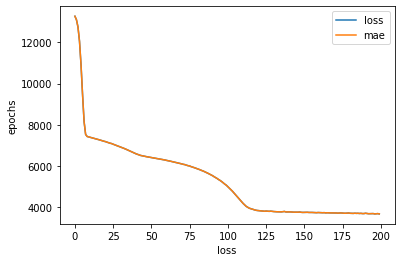

In [20]:
#plotting history (loss and mae)
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

❓ How long your model should train for?

Answer:
 It depends on model but tensorflow has a component called early stopping callback which will stop trainning model once your trainning stops improving

##Preprocessing Data (Normalization and Standardization)

in terms of scaling values, neural network prefer normalization

if you don't understand which to use you can try both and use that which works better

In [21]:
#importing libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
#Reading insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


to prepare our data we use some classes from sklearn

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder 
from sklearn.model_selection import train_test_split
#create column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #turn all these values between 0 and 1 (normalization)
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
#creating x and y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

#splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit columns transformer to train our data
ct.fit(X_train)

#Transformer trainning and testing data with normalization (MinMaxScaler), OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [23]:
#let's try how our data looks like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [31]:
#Now this is normalize data with hot encoded format
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [33]:
X_train_normal.head() #this is in numerical format so we cannot use panas for this purpose

AttributeError: ignored

In [34]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [37]:
insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


###So Good our data is ready to feed neural betwrok because it is now normalize and hot encoded

In [58]:
#Setting seed
tf.random.set_seed(42)
#creating model
insurance_model_4=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
#compiling model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["mae"]
)
#fitting model
insurance_model_4.fit(X_train_normal,y_train,epochs=100,verbose=0)

In [59]:
#Noe evalute data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3176.3691 - mae: 3176.3691


[3176.369140625, 3176.369140625]

In [45]:
#Now compare model 2 with model 4
#9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477
#[4924.34765625, 4924.34765625]
#We have reduced the error

In [36]:
X_train.shape,X_train_normal.shape #normal and encoded data (X_train_normal) has more column vecause of hot encodgin

((1070, 6), (1070, 11))

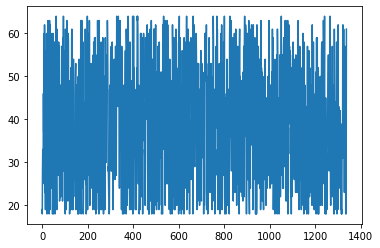

In [24]:
#We can't understanding this plot so we will use hist plot
X["age"].plot()

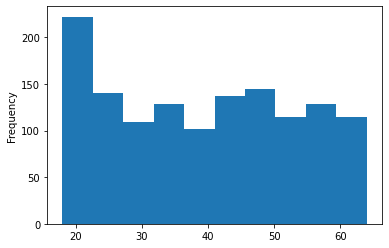

In [25]:
X["age"].plot(kind="hist")

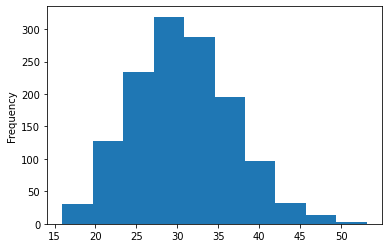

In [26]:
X["bmi"].plot(kind="hist")

In [27]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64